# Taqiya Ehsan
# Programming Exercise \# 2
---

# Preamble

In [1]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive

# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
%cd /content/drive/My\ Drive/ML/ProgrammingAssignment2 ###


Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/My Drive/ML/ProgrammingAssignment2 ###'
/content


In [2]:
# import relevant Python libraries

### Your import commands go here ###
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Feature Engineering for _Environmental Sensor Telemetry Data_**

## Problem 1.1

In [3]:
### Your code for loading the dataset goes here ###
iot_df = pd.read_csv('/content/drive/MyDrive/ML/ProgrammingAssignment2/iot_telemetry_dataset.csv')
iot_df.columns

Index(['ts', 'device', 'co', 'humidity', 'light', 'lpg', 'motion', 'smoke',
       'temp'],
      dtype='object')

### (a)

_[Your answer for 1.1(a) goes here]_

This is an **unsupervised learning task.** The dataset in a supervised learning task would have been annotated with labels corresponding to the prediction for each sample. In the case of this dataset, the collected data is meant to be used to gauge human presence -- however the dataset itself does not consist of information of whether human beings are near the sensors or not. That is to say, it is an unlabeled dataset. So this would be an unsupervised learning task.

### (b)

In [4]:
### Your code for 1.1(b) goes here ###
iot_df.shape

(405184, 9)

There are **405184** data samples

### (c)



In [5]:
### Your code for 1.1(c) goes here ###
iot_df["device"].value_counts()["00:0f:00:70:91:0a"]

111815


### (d)

In [6]:
### Your code for 1.1(d) goes here ###
iot_df["device"].value_counts()["1c:bf:ce:15:ec:4d"]

105918

In [7]:
### Your code for 1.1(e) goes here ###
iot_df["device"].value_counts()["b8:27:eb:bf:9d:51"]

187451

### (e)

## Problem 1.2

### (a)

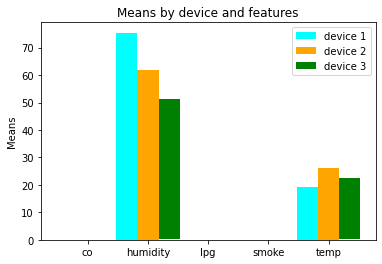

In [8]:
### Your code for 1.2(a) goes here ###
grouped_iot_df = iot_df.groupby("device")

# mean bar chart
device_1_co_mean = grouped_iot_df.get_group("00:0f:00:70:91:0a")["co"].mean()
device_1_humidity_mean = grouped_iot_df.get_group("00:0f:00:70:91:0a")["humidity"].mean()
device_1_lpg_mean = grouped_iot_df.get_group("00:0f:00:70:91:0a")["lpg"].mean()
device_1_smoke_mean = grouped_iot_df.get_group("00:0f:00:70:91:0a")["smoke"].mean()
device_1_temp_mean = grouped_iot_df.get_group("00:0f:00:70:91:0a")["temp"].mean()

device_2_co_mean = grouped_iot_df.get_group("1c:bf:ce:15:ec:4d")["co"].mean()
device_2_humidity_mean = grouped_iot_df.get_group("1c:bf:ce:15:ec:4d")["humidity"].mean()
device_2_lpg_mean = grouped_iot_df.get_group("1c:bf:ce:15:ec:4d")["lpg"].mean()
device_2_smoke_mean = grouped_iot_df.get_group("1c:bf:ce:15:ec:4d")["smoke"].mean()
device_2_temp_mean = grouped_iot_df.get_group("1c:bf:ce:15:ec:4d")["temp"].mean()

device_3_co_mean = grouped_iot_df.get_group("b8:27:eb:bf:9d:51")["co"].mean()
device_3_humidity_mean = grouped_iot_df.get_group("b8:27:eb:bf:9d:51")["humidity"].mean()
device_3_lpg_mean = grouped_iot_df.get_group("b8:27:eb:bf:9d:51")["lpg"].mean()
device_3_smoke_mean = grouped_iot_df.get_group("b8:27:eb:bf:9d:51")["smoke"].mean()
device_3_temp_mean = grouped_iot_df.get_group("b8:27:eb:bf:9d:51")["temp"].mean()

device_1_means = [device_1_co_mean, device_1_humidity_mean, device_1_lpg_mean, device_1_smoke_mean, device_1_temp_mean]
device_2_means = [device_2_co_mean, device_2_humidity_mean, device_2_lpg_mean, device_2_smoke_mean, device_2_temp_mean]
device_3_means = [device_3_co_mean, device_3_humidity_mean, device_3_lpg_mean, device_3_smoke_mean, device_3_temp_mean]

# print(device_1_means)
# print(device_2_means)
# print(device_3_means)

width = 0.35  # the width of the bars
x = np.arange(5)

plt.bar(x-0.35, device_1_means, width, color='cyan', label="device 1")
plt.bar(x, device_2_means, width, color='orange', label="device 2")
plt.bar(x+0.35, device_3_means, width, width, color='green', label="device 3")

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Means')
plt.title('Means by device and features')
plt.xticks(x, ['co', 'humidity', 'lpg', 'smoke', 'temp'])
plt.legend()

plt.show()

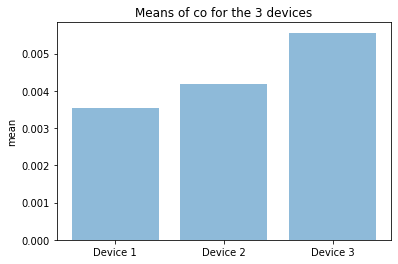

In [11]:
#co bar chart for means

objects = ('Device 1', 'Device 2', 'Device 3')
y_pos = np.arange(len(objects))
performance = [device_1_co_mean, device_2_co_mean, device_3_co_mean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('mean')
plt.title('Means of co for the 3 devices');

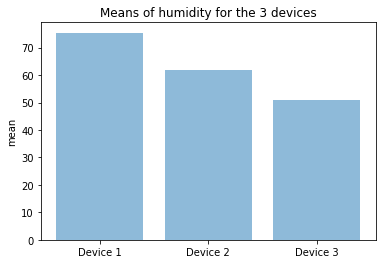

In [13]:
# humidity bar chart for means

objects = ('Device 1', 'Device 2', 'Device 3')
y_pos = np.arange(len(objects))
performance = [device_1_humidity_mean, device_2_humidity_mean, device_3_humidity_mean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('mean')
plt.title('Means of humidity for the 3 devices');

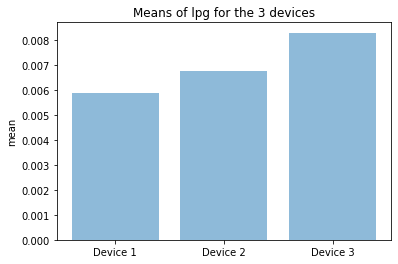

In [15]:
# lpg bar chart for means

objects = ('Device 1', 'Device 2', 'Device 3')
y_pos = np.arange(len(objects))
performance = [device_1_lpg_mean, device_2_lpg_mean, device_3_lpg_mean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('mean')
plt.title('Means of lpg for the 3 devices');

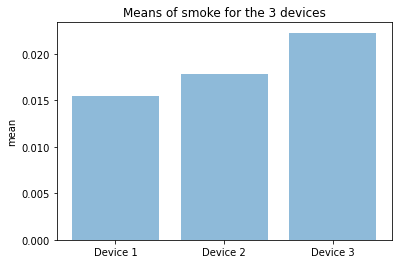

In [16]:
# smoke bar chart for means

objects = ('Device 1', 'Device 2', 'Device 3')
y_pos = np.arange(len(objects))
performance = [device_1_smoke_mean, device_2_smoke_mean, device_3_smoke_mean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('mean')
plt.title('Means of smoke for the 3 devices');

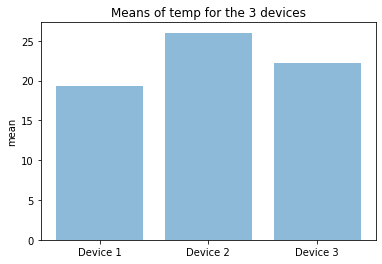

In [17]:
# temp bar chart for means

objects = ('Device 1', 'Device 2', 'Device 3')
y_pos = np.arange(len(objects))
performance = [device_1_temp_mean, device_2_temp_mean, device_3_temp_mean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('mean')
plt.title('Means of temp for the 3 devices');

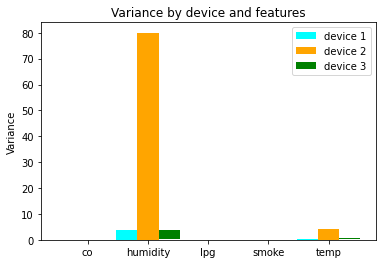

In [9]:
# variance bar chart
device_1_co_var = grouped_iot_df.get_group("00:0f:00:70:91:0a")["co"].var()
device_1_humidity_var = grouped_iot_df.get_group("00:0f:00:70:91:0a")["humidity"].var()
device_1_lpg_var = grouped_iot_df.get_group("00:0f:00:70:91:0a")["lpg"].var()
device_1_smoke_var = grouped_iot_df.get_group("00:0f:00:70:91:0a")["smoke"].var()
device_1_temp_var = grouped_iot_df.get_group("00:0f:00:70:91:0a")["temp"].var()

device_2_co_var = grouped_iot_df.get_group("1c:bf:ce:15:ec:4d")["co"].var()
device_2_humidity_var = grouped_iot_df.get_group("1c:bf:ce:15:ec:4d")["humidity"].var()
device_2_lpg_var = grouped_iot_df.get_group("1c:bf:ce:15:ec:4d")["lpg"].var()
device_2_smoke_var = grouped_iot_df.get_group("1c:bf:ce:15:ec:4d")["smoke"].var()
device_2_temp_var = grouped_iot_df.get_group("1c:bf:ce:15:ec:4d")["temp"].var()

device_3_co_var = grouped_iot_df.get_group("b8:27:eb:bf:9d:51")["co"].var()
device_3_humidity_var = grouped_iot_df.get_group("b8:27:eb:bf:9d:51")["humidity"].var()
device_3_lpg_var = grouped_iot_df.get_group("b8:27:eb:bf:9d:51")["lpg"].var()
device_3_smoke_var = grouped_iot_df.get_group("b8:27:eb:bf:9d:51")["smoke"].var()
device_3_temp_var = grouped_iot_df.get_group("b8:27:eb:bf:9d:51")["temp"].var()

device_1_vars = [device_1_co_var, device_1_humidity_var, device_1_lpg_var, device_1_smoke_var, device_1_temp_var]
device_2_vars = [device_2_co_var, device_2_humidity_var, device_2_lpg_var, device_2_smoke_var, device_2_temp_var]
device_3_vars = [device_3_co_var, device_3_humidity_var, device_3_lpg_var, device_3_smoke_var, device_3_temp_var]

width = 0.35  # the width of the bars
x = np.arange(5)

plt.bar(x-0.35, device_1_vars, width, color='cyan', label="device 1")
plt.bar(x, device_2_vars, width, color='orange', label="device 2")
plt.bar(x+0.35, device_3_vars, width, width, color='green', label="device 3")

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Variance')
plt.title('Variance by device and features')
plt.xticks(x, ['co', 'humidity', 'lpg', 'smoke', 'temp'])
plt.legend()

plt.show()

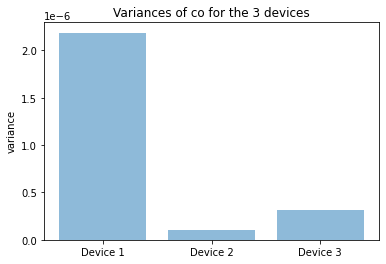

In [19]:
# co bar chart for vars

objects = ('Device 1', 'Device 2', 'Device 3')
y_pos = np.arange(len(objects))
performance = [device_1_co_var, device_2_co_var, device_3_co_var]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('variance')
plt.title('Variances of co for the 3 devices');

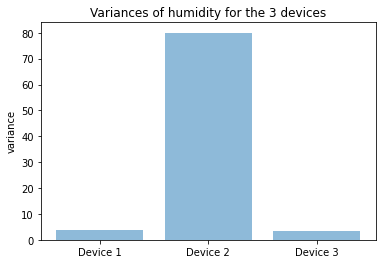

In [20]:
# humidity bar chart for vars

objects = ('Device 1', 'Device 2', 'Device 3')
y_pos = np.arange(len(objects))
performance = [device_1_humidity_var, device_2_humidity_var, device_3_humidity_var]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('variance')
plt.title('Variances of humidity for the 3 devices');

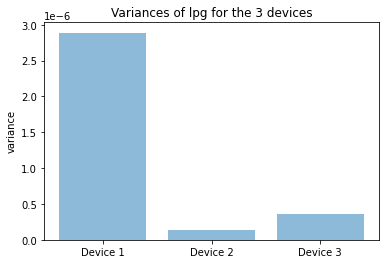

In [21]:
# lpg bar chart for vars

objects = ('Device 1', 'Device 2', 'Device 3')
y_pos = np.arange(len(objects))
performance = [device_1_lpg_var, device_2_lpg_var, device_3_lpg_var]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('variance')
plt.title('Variances of lpg for the 3 devices');

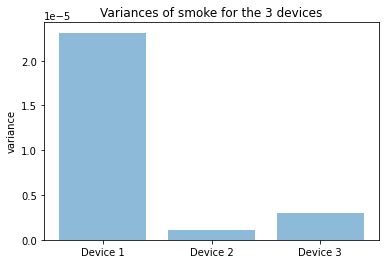

In [22]:
# smoke bar chart for vars

objects = ('Device 1', 'Device 2', 'Device 3')
y_pos = np.arange(len(objects))
performance = [device_1_smoke_var, device_2_smoke_var, device_3_smoke_var]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('variance')
plt.title('Variances of smoke for the 3 devices');

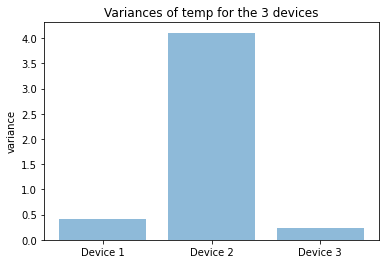

In [23]:
# temp bar chart for vars

objects = ('Device 1', 'Device 2', 'Device 3')
y_pos = np.arange(len(objects))
performance = [device_1_temp_var, device_2_temp_var, device_3_temp_var]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('variance')
plt.title('Variances of temp for the 3 devices');

_[Your answer for 1.2(a) goes here]_

In both the mean and variance charts, humidity and temperature features dominated in terms of value. The mean and variance for these two features were considerably higher than the others.

### (b)

In [24]:
### Your code for 1.2(b) goes here ###
norm_cols = ['co', 'humidity', 'lpg', 'smoke', 'temp'] 
preprocessed_iot_df = iot_df.copy()

preprocessed_iot_df.update(preprocessed_iot_df[preprocessed_iot_df['device'] == '00:0f:00:70:91:0a'][norm_cols].apply(sps.zscore)) 
preprocessed_iot_df.update(preprocessed_iot_df[preprocessed_iot_df['device'] == '1c:bf:ce:15:ec:4d'][norm_cols].apply(sps.zscore)) 
preprocessed_iot_df.update(preprocessed_iot_df[preprocessed_iot_df['device'] == 'b8:27:eb:bf:9d:51'][norm_cols].apply(sps.zscore)) 

In [25]:
preprocessed_iot_df.head(21)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,-1.080796,0.098428,False,-1.093494,False,-1.091262,0.871612
1,1.594512e+09,00:0f:00:70:91:0a,-0.464453,0.281223,False,-0.458335,False,-0.460394,0.524164
2,1.594512e+09,b8:27:eb:bf:9d:51,-1.044867,0.045488,False,-1.056110,False,-1.054139,0.664101
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.687054,1.664636,True,0.696251,False,0.694636,0.480892
4,1.594512e+09,b8:27:eb:bf:9d:51,-1.060347,0.045488,False,-1.072212,False,-1.070130,0.664101
5,1.594512e+09,1c:bf:ce:15:ec:4d,0.649530,1.787613,True,0.659046,False,0.657373,0.480892
6,1.594512e+09,b8:27:eb:bf:9d:51,-1.044844,0.045488,False,-1.056086,False,-1.054116,0.664101
7,1.594512e+09,00:0f:00:70:91:0a,-0.398158,0.281223,False,-0.383563,False,-0.387060,0.524164
8,1.594512e+09,1c:bf:ce:15:ec:4d,0.507422,1.787613,True,0.517890,False,0.516041,0.480892
9,1.594512e+09,b8:27:eb:bf:9d:51,-1.055170,0.045488,False,-1.066827,False,-1.064782,0.664101


### (c)

In [26]:
### Your code for 1.2(c) goes here ###

# device
preprocessed_iot_df.insert(2, "D0", pd.get_dummies(iot_df["device"])['00:0f:00:70:91:0a'], False)
preprocessed_iot_df.insert(3, "D1", pd.get_dummies(iot_df["device"])['1c:bf:ce:15:ec:4d'], False)
preprocessed_iot_df.insert(4, "D2", pd.get_dummies(iot_df["device"])['b8:27:eb:bf:9d:51'], False)

# light
preprocessed_iot_df.insert(8, "L0", pd.get_dummies(iot_df["light"])[False], False)
preprocessed_iot_df.insert(9, "L1", pd.get_dummies(iot_df["light"])[True], False)

# motion
preprocessed_iot_df.insert(12, "M0", pd.get_dummies(iot_df["motion"])[False], False)
preprocessed_iot_df.insert(13, "M1", pd.get_dummies(iot_df["motion"])[True], False)

preprocessed_iot_df = preprocessed_iot_df.drop(['device', 'light', 'motion'], axis=1)

### (d)

In [28]:
### Your code for 1.2(d) goes here ###
preprocessed_iot_df.head(21)

,ts,D0,D1,D2,co,humidity,L0,L1,lpg,M0,M1,smoke,temp
0,1.594512e+09,0,0,1,-1.080796,0.098428,1,0,-1.093494,1,0,-1.091262,0.871612
1,1.594512e+09,1,0,0,-0.464453,0.281223,1,0,-0.458335,1,0,-0.460394,0.524164
2,1.594512e+09,0,0,1,-1.044867,0.045488,1,0,-1.056110,1,0,-1.054139,0.664101
3,1.594512e+09,0,1,0,0.687054,1.664636,0,1,0.696251,1,0,0.694636,0.480892
4,1.594512e+09,0,0,1,-1.060347,0.045488,1,0,-1.072212,1,0,-1.070130,0.664101
5,1.594512e+09,0,1,0,0.649530,1.787613,0,1,0.659046,1,0,0.657373,0.480892
6,1.594512e+09,0,0,1,-1.044844,0.045488,1,0,-1.056086,1,0,-1.054116,0.664101
7,1.594512e+09,1,0,0,-0.398158,0.281223,1,0,-0.383563,1,0,-0.387060,0.524164
8,1.594512e+09,0,1,0,0.507422,1.787613,0,1,0.517890,1,0,0.516041,0.480892
9,1.594512e+09,0,0,1,-1.055170,0.045488,1,0,-1.066827,1,0,-1.064782,0.664101


### (e)

_[Your answer for 1.2(e) goes here]_

The **ts** variable is the timestamp for each data sample collected. This remains intact even in the pre-processed data because this is the unique identifier of each sample. The timestamp is how we distinguish between data samples. If it is changed in any way, we will not be able to map data sample to time of day and consequently won't be able to identify at what time of the day human beings are most present around the sensors. This will hamper the training process of the model resulting in skewed predictions.

## Problem 1.3

In [32]:
### Your code for 1.3 goes here ###
preprocessed_iot_df["mean"] = iot_df[['co', 'humidity', 'lpg', 'smoke', 'temp']].mean(axis=1)
preprocessed_iot_df["gmean"] = sps.gmean(iot_df[['co', 'humidity', 'lpg', 'smoke', 'temp']], axis=1)
preprocessed_iot_df["hmean"] = sps.mstats.hmean(iot_df[['co', 'humidity', 'lpg', 'smoke', 'temp']], axis=1)
preprocessed_iot_df["var"] = iot_df[['co', 'humidity', 'lpg', 'smoke', 'temp']].var(axis=1)
preprocessed_iot_df["kurtosis"] = sps.kurtosis(iot_df[['co', 'humidity', 'lpg', 'smoke', 'temp']], axis = 1)
preprocessed_iot_df["skew"] = sps.skew(iot_df[['co', 'humidity', 'lpg', 'smoke', 'temp']], axis = 1)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:275: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


In [33]:
preprocessed_iot_df.head(41)

,ts,D0,D1,D2,co,humidity,L0,L1,lpg,M0,M1,smoke,temp,mean,gmean,hmean,var,kurtosis,skew
0,1.594512e+09,0,0,1,-1.080796,0.098428,1,0,-1.093494,1,0,-1.091262,0.871612,14.746604,0.245731,0.013105,507.244728,-0.725326,0.943233
1,1.594512e+09,1,0,0,-0.464453,0.281223,1,0,-0.458335,1,0,-0.460394,0.524164,19.144246,0.195924,0.008025,1082.894866,-0.108093,1.276663
2,1.594512e+09,0,0,1,-1.044867,0.045488,1,0,-1.056110,1,0,-1.054139,0.664101,14.706625,0.245914,0.013151,505.036607,-0.721394,0.945249
3,1.594512e+09,0,1,0,0.687054,1.664636,0,1,0.696251,1,0,0.694636,0.480892,20.766012,0.260278,0.011814,1117.776178,-0.394623,1.117057
4,1.594512e+09,0,0,1,-1.060347,0.045488,1,0,-1.072212,1,0,-1.070130,0.664101,14.706616,0.245700,0.013131,505.036943,-0.721394,0.945249
5,1.594512e+09,0,1,0,0.649530,1.787613,0,1,0.659046,1,0,0.657373,0.480892,20.985998,0.260664,0.011786,1148.837513,-0.377846,1.126135
6,1.594512e+09,0,0,1,-1.044844,0.045488,1,0,-1.056086,1,0,-1.054116,0.664101,14.706625,0.245914,0.013151,505.036606,-0.721394,0.945249
7,1.594512e+09,1,0,0,-0.398158,0.281223,1,0,-0.383563,1,0,-0.387060,0.524164,19.144362,0.199271,0.008270,1082.889338,-0.108088,1.276666
8,1.594512e+09,0,1,0,0.507422,1.787613,0,1,0.517890,1,0,0.516041,0.480892,20.985949,0.259311,0.011678,1148.840107,-0.377849,1.126134
9,1.594512e+09,0,0,1,-1.055170,0.045488,1,0,-1.066827,1,0,-1.064782,0.664101,14.706619,0.245771,0.013138,505.036831,-0.721394,0.945249


# **2. Feature Learning for _Synthetically Generated Data_**

## Problem 2.1

### (a)

In [ ]:
### Your code for 2.1(a) goes here ###
B = np.random.randn(3, 2)
B

array([[ 0.61128953,  0.26630075],
       [-1.63633897,  0.20665564],
       [-1.35848219,  0.77803926]])

### (b)

In [ ]:
from numpy import linalg
### Your code for 2.1(b) goes here ###
linalg.matrix_rank(B)

2

### (c)



In [ ]:
### Your code for 2.1(c) goes here ###
print(f'norm of col 1 = {linalg.norm(B[:, 0])}')
print(f'norm of col 2 = {linalg.norm(B[:, 1])}')
print(f'inner dot product of col 1 and col 2 = {np.inner(B[:, 0], B[:, 1])}')

norm of col 1 = 2.212861037333528
norm of col 2 = 0.8479196478626962
inner dot product of col 1 and col 2 = -1.2323242901618312


### (d)

In [ ]:
### Your code for 2.1(d) goes here ###
# The column vectors of u are an orthonormal span of column space of B
u, e, v = linalg.svd(B)
u

array([[-0.22712778, -0.67562885, -0.70138337],
       [ 0.71384471,  0.37440266, -0.59181786],
       [ 0.66244902, -0.63509708,  0.39725683]])

## Problem 2.2

### (a)

In [ ]:
### Your code for 2.2(a) goes here ###
X_rand = np.zeros([3, 200])

for ctr in range(199):
  v = np.random.randn(2, 1)
  X_rand[:, [ctr]] = np.matmul(B, v)

In [ ]:
X_rand.shape # 3 features are in the rows

(3, 200)

### (b)

_[Your answer for 2.2(b) goes here]_

Yes, **x$_{i}$** lies in S, which is the subspace of **B**. The vector **x$_{i}$** is obtained by multiplying **B** with a random vector **v**. By definition, a vector lies in a subspace if it is some linear combination of the basis vectors spanning that subspace. Since fixed matrix **B** has 2 linearly independent columns (rank(**B**) = 2), the column space of **B** forms a basis of **S**, and **x_i** therefore becomes a linear combination of the basis vectors of **S**. Hence, **x$_{i}$** lies in **S**. 

### (c)

In [ ]:
### Your code for 2.2(c) goes here ###
X = np.transpose(X_rand)
X.shape

(200, 3)

_[Your answer for 2.2(c) goes here]_

Here, *n* is the number of samples = 200, and *p* is the number of features = 3. So the dimension of **X** is (200, 3).

### (d)

In [ ]:
### Your code for 2.2(d) goes here ###
linalg.matrix_rank(X)

2

## Problem 2.3

  ### (a)

In [ ]:
### Your code for 2.3(a) goes here ###
X_T = np.transpose(X)
C = np.matmul(X_T, X)
# print(C.shape)

#i
e, v = linalg.eig(C)
print(f'eigenvectors of C = {v}')

U, E, V_T = linalg.svd(X)
V = np.transpose(V_T)
print(f'right singular vectors of X = {V}')

eigenvectors of C = [[-0.21660432  0.70138337  0.6790758 ]
 [ 0.70794212  0.59181786 -0.38544723]
 [ 0.67223546 -0.39725683  0.62472913]]
right singular vectors of X = [[-0.21660432  0.6790758  -0.70138337]
 [ 0.70794212 -0.38544723 -0.59181786]
 [ 0.67223546  0.62472913  0.39725683]]


In [ ]:
#ii
eigenvals = []
singvals = []

for idx in range(0, len(E)): 
  singvals.append(E[idx] ** 2)
  eigenvals.append(e[idx])

print(f'singular values = {singvals}')
print(f'eigenvalues = {eigenvals}')

singular values = [1053.6713208393885, 79.16404108290271, 7.04455682430458e-30]
eigenvalues = [1053.6713208393887, 3.944251963371861e-15, 79.16404108290263]


In [ ]:
#iii
energy = linalg.norm(X, 'fro')
print(f'Frobenius norm squared = {energy ** 2}')

sum = 0
for sgval in E:
  sum = sum + (sgval ** 2)
print(f'Sum of squares of singular values = {sum}')

Frobenius norm squared = 1132.8353619222908
Sum of squares of singular values = 1132.8353619222912


_[Any additional comments/discussion for 2.3(a) go here]_

* Some eigenvectors and right singular vectors are opposite signs -- we know that singular vectors and eigenvectors are identical, up to an algebraic sign.

* The last eigenvalue is negative -- **C** is a symmetric matrix, but not positive semidefinite.

### (b)

_[Your answer for 2.3(b) goes here]_

(i) There are 2 singluar values that capture the most energy of the data matrix, the third singular value is very small (approx. 0). However, there exists a third singular value which is not exactly 0 --  this happens because dim(null(**X**)) = 0 i.e. the null space of **X** does not exist. In other words, there is no linear combination among the features of **X**. 

(ii) The right singular vectors correspond to the largest singular values of the matrix. They signify the spatial distribution of the singular values. The data matrix **X** is essentially the projection of random vector matrix **V** onto the subspace *S* of matrix **B**. So, the right singular vetors represent which singular values capture the most features from **V**. 

In dimensionality reduction, we want to capture the maximum possible information of the higher dimensional data matrix projected onto the lower dimension space [subspace of **B** in this case]. The captured high dimensional information here are the singular values, and the right singular vectors indicate which singular values project maximum information onto the lower dimensional subspace *S*.

## Problem 2.4

### (a)

_[Your answer for 2.4(a) goes here]_

2 principal components should be enough as that captures maximum energy of the dataset. The energy captured by the signular values is = (295.59330511188915 + 109.02247717800115 + 1.7763218894107944e-30) = 404.6157822898903 and energy captured by the first 2 values is 404.61578. Here, 404.61578/404.6157822898903 ≈ 100% i.e. 2 principal components are sufficient to capture all variation of the given dataset. 

### (b)

_[Your answer for 2.4(b) goes here]_

In [ ]:
### Your code for 2.4(b) goes here ###
means = []
X_pc = np.matmul(V, X_T)

for i in range(3):
  means.append(X_T[i, :].mean())
means

[2.9116322487041656e-05, 0.018907157964684534, 0.028218559546997132]

[Any additional comments/discussion for 2.4(b) go here]

i) For random variables **x$_{1}$, x$_{2}$, x$_{3}$** have mean 0 and variance 1 by definition because of the way we generated our data. So,

**E[x$_{k}$] = (1/3)(E[x$_{1}$] + E[x$_{2}] + E[x$_{3}])** = (1/3)(0 + 0 + 0) = 0 

ii) Running the code cell above prints the mean of each sample vector and each entry is very small.

### (c)

In [ ]:
### Your code for 2.4(c) goes here ###
Vk = V[:, 0:2]
Vk.shape

(3, 2)

### (d)

In [ ]:
Vk_T = np.transpose(Vk)
Vk_T.shape

(2, 3)

In [ ]:
### Your code for 2.4(d) goes here ###
Xf = np.matmul(Vk_T, X_T) 
Xf.shape

(2, 200)

### (e)

In [ ]:
### Your code for 2.4(e) goes here ###
X_proj = np.matmul(Vk, Xf)
X_proj.shape

(3, 200)

### (f)

In [ ]:
### Your code for 2.4(f) goes here ###
error = (linalg.norm(np.subtract(X_T, X_proj), 'fro')) 
error

6.825491120305621e-15

### (g)

In [ ]:
### Your code for 2.4(g) goes here ###
Vk1 = V[:, 0:1]
Vk1_T = np.transpose(Vk1)
# Vk1.shape

Xf1 = np.matmul(Vk1_T, X_T) 
Xf1.shape

(1, 200)

### (h)

In [ ]:
### Your code for 2.4(h) goes here ###
X_proj1 = np.matmul(Vk1, Xf1)
X_proj1.shape

(3, 200)

### (i)

In [ ]:
### Your code for 2.4(i) goes here ###
error1 = (linalg.norm(np.subtract(X_T, X_proj1), 'fro')) ** 2 
error1 

79.16404108290276

### (j)

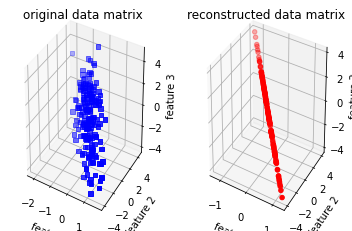

In [ ]:
### Your code for 2.4(j) goes here ###
fig = plt.figure()

# original data matrix
ax = fig.add_subplot(1, 2, 1, projection='3d')

X = X_T[0]
Y = X_T[1]
Z = X_T[2]

surf1 = ax.scatter(X, Y, Z, c='blue', marker="s", label='original datapoints')
plt.title('original data matrix')

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')

# reconstructed data matrix
ax = fig.add_subplot(1, 2, 2, projection='3d')

X_proj = X_proj1[0]
Y_proj = X_proj1[1]
Z_proj = X_proj1[2]

surf2 = ax.scatter(X_proj, Y_proj, Z_proj, c='red', marker="o", label='reconstructed datapoints')
plt.title('reconstructed data matrix')

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')

plt.show();

_[Your comments for 2.4(j) go here]_

* The original data plot (on the left) captures and accurate representation of the variance and high correlation of the data matrix. The data points are scattered as would be intuitive for this type of dataset.

* The reconstructed data plot (on the right) lies along a single straight line, showing no variation on any other side but that axis. This is where the projected data errors from the original data. This means that the reconstructed datapoints have a higher  correlation between the two features. 